### 

# Overall Student Attendance

### 

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
f = open('course_schedules 1st_pro.json', encoding="utf8")
data = json.load(f)
df = pd.DataFrame(data)
df=df.loc[df['status'] == "completed"]

In [3]:
attendance=[]
Name=[]
present=[]
absent=[]
pending=[]
auto_a=[]
manual_a=[]
auto_p=[]
manual_p=[]

student_auto_p=[]
student_manual_p=[]
all_student=[]

In [4]:
for no ,session in df.iterrows():
    for i in session["staffs"]:
        first=i["staff_name"]["first"]
        last=i["staff_name"]["last"]
        Name.append(" ".join([first, last]))
        present_=0
        absent_=0
        pending_=0
        auto_a_=0
        manual_a_=0
        auto_p_=0
        manual_p_=0
        student_auto_p_=[]
        student_manual_p_=[]
        for i in session["students"]:
            f=i["name"]["first"]
            l=i["name"]["last"]
            all_student.append(" ".join([f, l]))
            if i["status"]=="absent":
                absent_+=1
                try:
                    if i["mode"]=="auto":
                        auto_a_+=1
                    elif i["mode"]=="manual":
                        manual_a_+=1
                except:
                    continue 
                
            elif i["status"]=="pending":
                pending_+=1
            
            elif i["status"]=="present":
                present_+=1
                try:
                    if i["mode"]=="auto":
                        first=i["name"]["first"]
                        last=i["name"]["last"]
                        student_auto_p_.append(" ".join([first, last]))
                        auto_p_+=1
                    elif i["mode"]=="manual":
                        first=i["name"]["first"]
                        last=i["name"]["last"]
                        student_manual_p_.append(" ".join([first, last]))
                        manual_p_+=1
                except:
                    continue
        #status.append(" ".join([str(present_), str(absent_),str(pending_),str(auto_a_),str(manual_a_),str(auto_p_),str(manual_p_)]))
        present.append(str(present_))
        absent.append(str(absent_))
        pending.append(str(pending_))
        auto_a.append(str(auto_a_))
        manual_a.append(str(manual_a_))
        auto_p.append(str(auto_p_))
        manual_p.append(str(manual_p_))
        student_auto_p.append(student_auto_p_)
        student_manual_p.append(student_manual_p_)

# 

# 

## Create new Data_frame

### 

In [5]:
df = pd.DataFrame(list(zip(Name,present,absent,pending,auto_a,manual_a,auto_p,manual_p,student_auto_p,student_manual_p)),columns =["Name","present","absent","pending","auto_a","manual_a","auto_p","manual_p","student_auto_p","student_manual_p"])

In [6]:
df.head()

,Name,present,absent,pending,auto_a,manual_a,auto_p,manual_p,student_auto_p,student_manual_p
0,MARWA MOHAMED SAFWAT,28,0,0,0,0,0,28,[],"[ADEL A ALDORWISH, ABDULLAH A ALRASHID, FADI S..."
1,MUAZZAM MAQBUL,5,0,0,0,0,1,4,[Liale Oukal],"[Lamis Aljohani, Renad ALmalki, Hanin AL otibi..."
2,Solafa Azzouz,35,0,0,0,0,3,32,"[Aneesa S, Ghada Abudlkareem Alalaawi, Refal ...","[Dummy8 Dummy8, Salma Hussain, Raghad Nasser B..."
3,RUKHSANA SATAR,87,0,0,0,0,30,57,"[BAYAN QASSEM QATTAB, ANWAAR MURTADAH BANJABI,...","[TAHANI AL MAATAIRI, WEJDAN TAHA ALYENBAAWI, R..."
4,Asmaa Elbakry,105,0,0,0,0,2,103,"[Aneesa S, Ghada Abudlkareem Alalaawi]","[Dummy8 Dummy8, Salma Hussain, Raghad Nasser B..."


# 

### need to update 

In [7]:
df=df.head(500)

# 

In [8]:
all_student=set(all_student)

In [9]:
name=[]
pie=[]
per=[]
classes=[]

In [10]:
for stu in all_student:
    auto=0
    manual=0
    class_=0
    name.append(stu)
    for no ,session in df.iterrows():
        #for i in session["student_auto_p"]:
        if stu in session["student_auto_p"]:
            auto+=1
            class_+=1
        if stu in session["student_manual_p"]:
            manual+=1
            class_+=1
    classes.append(class_)
    pie_=(auto,manual)
    pie.append(pie_)
    per_=auto+manual
    if per_ !=0:
        per_=(auto/per_)*100
        per.append(per_)
    else:
        per.append("0")

In [12]:
chart_data = pd.DataFrame(list(zip(name,pie,per,classes)),columns =["Name","pie","per","classes"])

In [13]:
chart_data['per'] = chart_data['per'].astype(int)

In [14]:
chart_data=chart_data.sort_values(['per','classes'],ascending = [True, False], na_position = 'first')

In [15]:
chart_data.loc[chart_data['pie'] == (0, 0)]

,Name,pie,per,classes
8,ALZAHRAA Qasem AL matari,"(0, 0)",0,0
18,FATIMAH A AHMED,"(0, 0)",0,0
19,OMAR DAIFALLH ALHARBI,"(0, 0)",0,0
20,SAFIYAH ALI ALAMOUDI,"(0, 0)",0,0
27,FAISAL M ALZAHRANI,"(0, 0)",0,0
...,...,...,...,...
1851,Youmna Moussa ELabd,"(0, 0)",0,0
1857,BAKRI B SHATA,"(0, 0)",0,0
1858,MOHAMMED M MALIBARI,"(0, 0)",0,0
1873,Amnah Jawhali,"(0, 0)",0,0


# 

## Convert DF to CSV file to export

### 

In [16]:
#chart_data.to_csv('Overall_student_Attendance.csv')

In [17]:
chart_data=chart_data.loc[chart_data['per'] != 0]
chart_data=chart_data.loc[chart_data['per'] != 100]

In [18]:
chart_data

,Name,pie,per,classes
609,Amro Wan Gah,"(1, 31)",3,32
1615,ZIYAD A ALMURDHIMAH,"(1, 31)",3,32
1865,Hanin AL otibi,"(1, 31)",3,32
1081,Amjad Bayameen,"(1, 30)",3,31
151,Mashael Shaikhi,"(1, 29)",3,30
...,...,...,...,...
1354,SHUROOG ABDULRAHMAN BASWIDAN,"(11, 1)",91,12
348,ABDULLAH ABDULLAH ALJEHANY,"(12, 1)",92,13
968,RAYAN ABDULLAH ALNAFISI,"(12, 1)",92,13
664,MESHAL ABDULHAI MULLA,"(14, 1)",93,15


In [19]:
#taking middle 10 data for visualization
chart_data=chart_data.iloc[250:260]

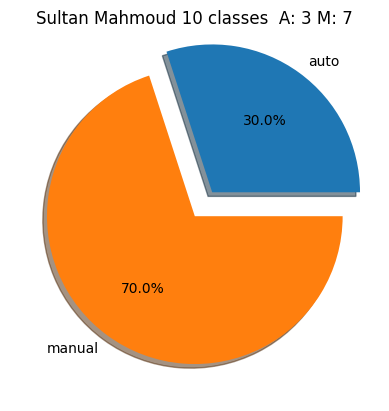

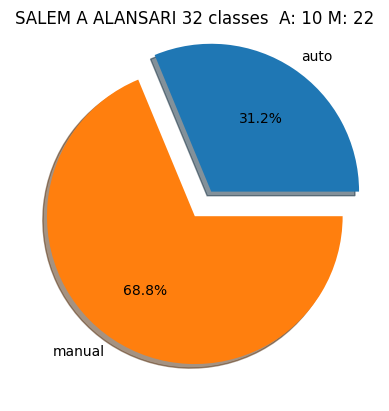

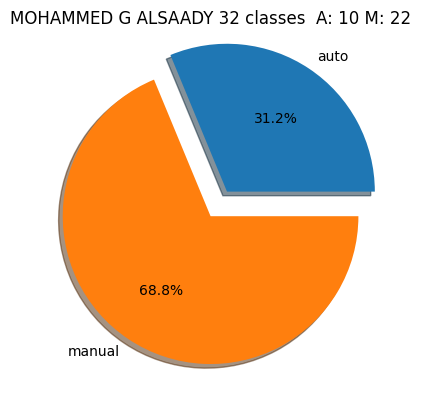

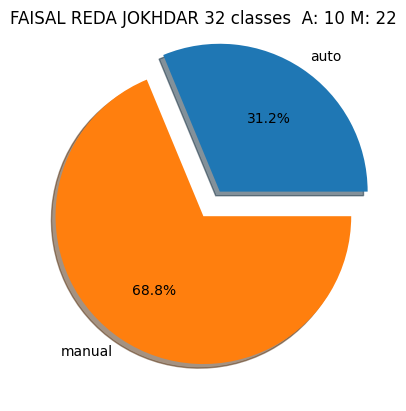

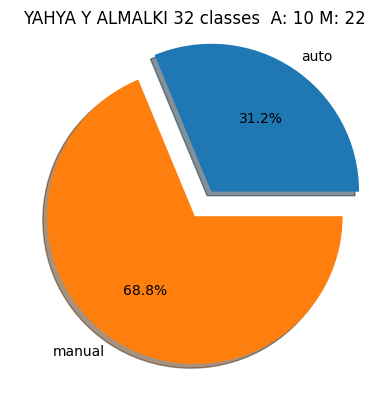

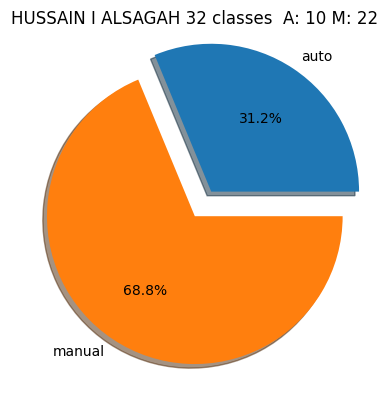

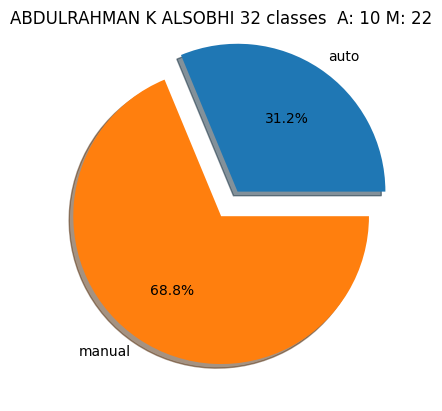

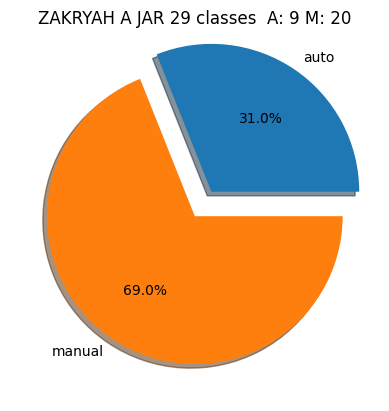

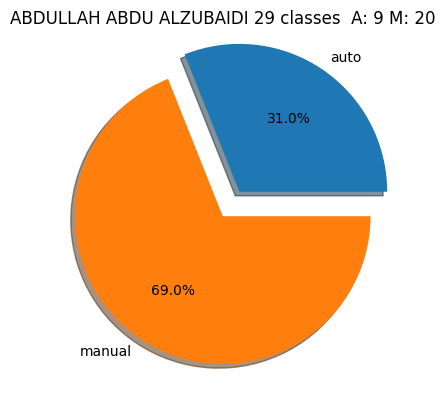

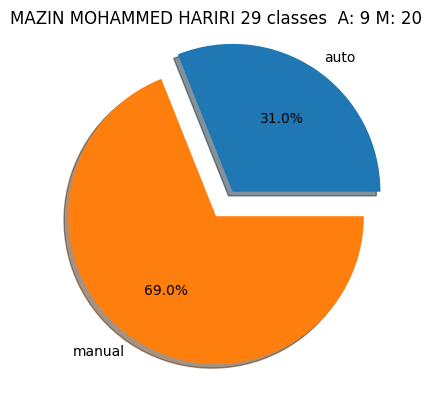

In [20]:
for no ,session in chart_data.iterrows():
    if session["pie"]!=(0, 0):
        if session["per"] >= 90:
            lan=" (Best student)"
        else:
            lan=""
        mylabels = ["auto", "manual"]
        myexplode = [0.2, 0]
        plt.title(session["Name"]+" "+str(session["classes"])+" classes "+lan+" A: "+str(session["pie"][0])+" M: "+str(session["pie"][1]))
        plt.pie(session["pie"],labels = mylabels, explode = myexplode, shadow = True,autopct='%1.1f%%')
        plt.show() 
        print("""

        """)